<a href="https://colab.research.google.com/github/Amarlalsingh/Linear_Regression/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%matplotlib inline   
"""To set this up, before any plotting or import of matplotlib is performed you must 
execute the %matplotlib magic command. 
This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib;"""

'To set this up, before any plotting or import of matplotlib is performed you must \nexecute the %matplotlib magic command. \nThis performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib;'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading data
data=pd.read_csv('/content/drive/My Drive/Datasets/head_brain /datasets_56097_107686_headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
#collecting x and y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values
for i in range(10):
  print(X[i],Y[i])


4512 1530
3738 1297
4261 1335
3777 1282
4177 1590
3585 1300
3785 1400
3559 1255
3613 1355
3982 1375


In [ ]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [ ]:
meanx=np.mean(X)
meany=np.mean(Y)
print(meanx,meany)

3633.9915611814345 1282.873417721519


In [ ]:
n=len(X)
n

237

In [52]:
num=0
denm=0
for i in range(n):
  num+=(X[i]-meanx)*(Y[i]-meany)
  denm+=(X[i]-meanx)**2
print(num,denm)
m=num/denm
c=meany-(meanx*m)
print("slope of line found is",m , "constant is",c)

[8294376.74683544] [31486153.98312234]
slope of line found is [0.26342934] constant is [325.57342105]


In [ ]:
# Now plotting actual X,Y as scatter plot and our found regression line  

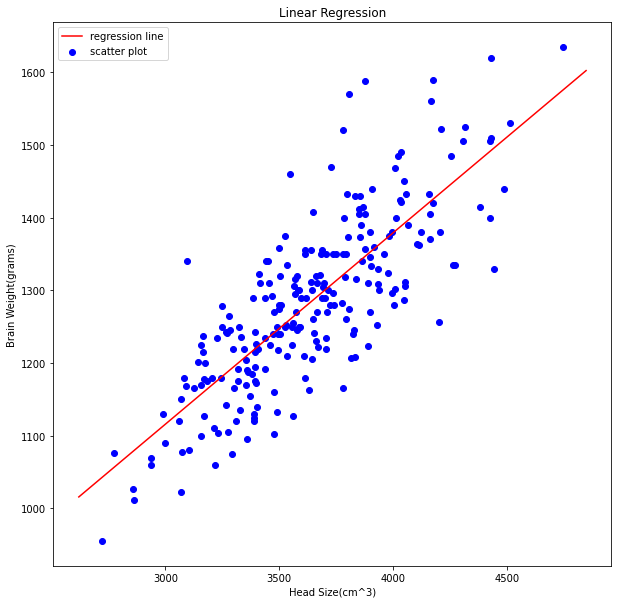

In [57]:
maxx=np.max(X)+100
minx=np.min(X)-100
x=np.linspace(minx,maxx,1000)
y=x*m+c
#Plotting line
plt.rcParams['figure.figsize']=(10,10)
plt.plot(x,y,color='r',label="regression line")
#Plotting Scatter Points
plt.scatter(X,Y,color='b',label="scatter plot")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Finding R square error 
rnumr=0
rdenm=0
for i in range(n):
  ypred=X[i]*m+c
  rnumr+=(ypred-meany)**2
  rdenm+=(Y[i]-meany)**2
r=rnumr/rdenm
print(r)

0.6393117199570001


In [ ]:
# Finding RMSE(root mean square error)
rmse=0
for i in range(n):
  ypred=X[i]*m+c
  rmse+=(ypred-Y[i])**2
rmse=np.sqrt(rmse/n)
print(rmse)

72.1206213783709


Using **Sklearn**

<class 'numpy.ndarray'>
(237, 1)


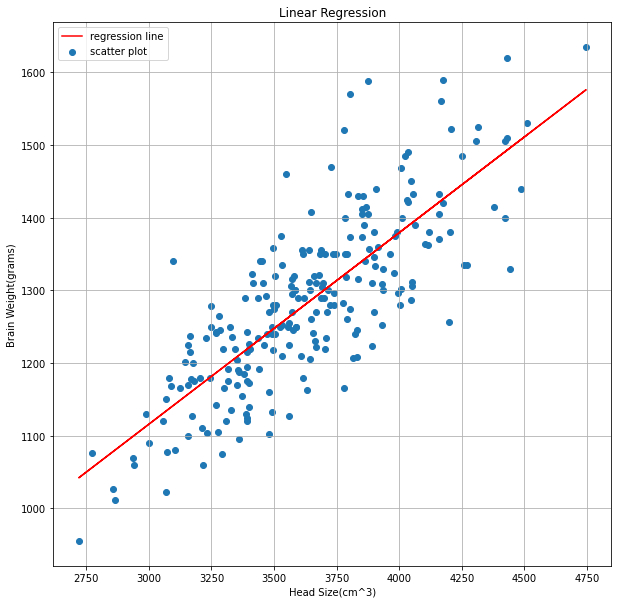

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=X.reshape((n,1))
print(type(X))
print(X.shape)
#Creating model
reg=LinearRegression()
#Fitting Training data
reg.fit(X,Y)
#Predicting Y
Y_pred=reg.predict(X)
plt.scatter(X,Y,label="scatter plot")
plt.plot(X,Y_pred,color='r',label="regression line")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.title("Linear Regression")
plt.grid()
plt.legend()
plt.show()


In [50]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print("root mean square error is " ,np.sqrt(mse))
print("r square score is " ,r2_score)


root mean square error is  72.1206213783709
r square score is  0.639311719957
